<a href="https://colab.research.google.com/github/ecandes/stat318/blob/master/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


In [0]:
class TravelingSalesman:

  def __init__(self, locations):
    self.ncities = len(locations)
    self.cities = locations
    self.distances()

  def distances(self):
    self.x, self.y = zip(*self.cities)
    # ncities x 2 matrix of coordinates
    X = np.c_[self.x, self.y]
    C = X @ X.T
    c = np.diag(C)
    # D is ncities x ncities matrix storing pairwise distances
    self.D = np.sqrt(np.outer(c, np.ones(self.ncities)) +
                     np.outer(np.ones(self.ncities), c) - 2 * C)

  def lengthTour(self, tour):
    length = 0
    for city1, city2 in zip(tour, np.roll(tour, -1)):
      length += self.D[city1, city2]
    return length

  def drawTour(self, tour=None):
    plt.scatter(self.x, self.y)
    if not tour is None:
      for city1, city2 in zip(tour, np.roll(tour, -1)):
        plt.plot([self.x[city1], self.x[city2]], [self.y[city1], self.y[city2]], 
                 'r', alpha=0.5)

  def annealing(self, tour, **options):
      def h(u):
        return min(u, 1)

      def schedule(**options):
        nsteps = options['nsteps']
        n = np.arange(0, nsteps)
        if options['schedule'] == 'geometric':
          T = options['Tinit'] * (options['Tfinal'] /
                                  options['Tinit'])**(n / nsteps)
        elif options['schedule'] == 'linear':
          T = options['Tinit'] + (options['Tfinal'] -
            options['Tinit']) * n / nsteps
        
        return nsteps, T


      nsteps, T = schedule(**options)
      length_list = np.zeros(nsteps+1)
      length_list[0] = self.lengthTour(tour)

      for t in range(nsteps):
        # Pick two cities at random
        cityPair = np.random.choice(range(1,self.ncities),size=2,replace=False)
        i, j = min(cityPair), max(cityPair)
       
        # Replace segment
        new_tour = tour.copy()
        swap = np.arange(i,j+1,dtype=int)
        new_tour[swap] = tour[swap[::-1]]

        # Compute length of new tour 
        shifted_tour = np.roll(tour,-1)
        Delta = self.D[tour[i-1],tour[j]] + self.D[tour[i],shifted_tour[j]] - self.D[tour[i-1],tour[i]] - self.D[tour[j],shifted_tour[j]]
        new_length = length_list[t] + Delta 

        # Decide whether to accept the new tour 
        if np.random.rand(1) < h(np.exp(-Delta/T[t])):
          tour = new_tour
          length_list[t+1] = new_length
        else:
          length_list[t+1] = length_list[t]
    
      return tour, length_list


### Structured locations

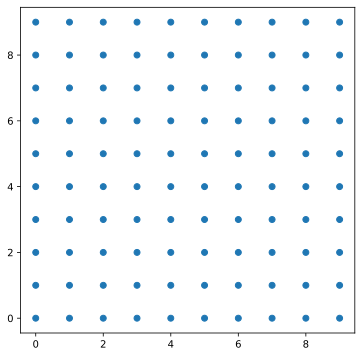

In [220]:
# Locations of the cities 
n = 10
locations = [(i,j) for i in range(n) for j in range(n)]
tsp = TravelingSalesman(locations)
tsp.drawTour()
plt.show()

One run

Tour length: 549.05
Tour length: 103.31
CPU times: user 9.07 s, sys: 168 ms, total: 9.24 s
Wall time: 9.04 s


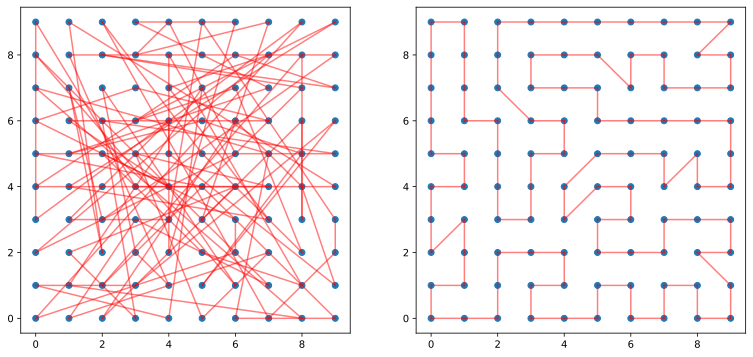

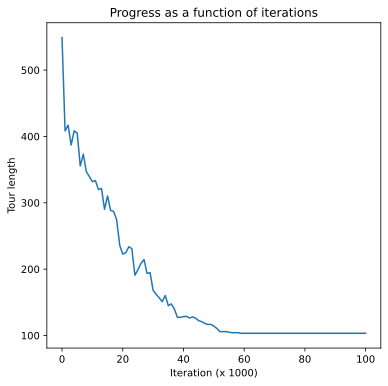

In [270]:
%%time

options = {'nsteps': 100000, 'Tinit':5, 'Tfinal':.01, 'schedule':'geometric'}

def oneRun(step):
  tsp = TravelingSalesman(locations)

  fig = plt.figure()
  fig.set_figheight(6) 
  fig.set_figwidth(13)
  
  a = fig.add_subplot(1,2,1)
  tour = np.random.permutation(tsp.ncities)
  tsp.drawTour(tour)
  print('Tour length: {:.2f}'.format(tsp.lengthTour(tour)))
  
  a = fig.add_subplot(1,2,2)
  tour, length_list = tsp.annealing(tour,**options) 
  tsp.drawTour(tour)
  print('Tour length: {:.2f}'.format(tsp.lengthTour(tour)))
  fig.show()

  fig = plt.figure()
  fig.set_figheight(6) 
  fig.set_figwidth(6)
  plt.plot(length_list[::step])
  plt.xlabel('Iteration (x {})'.format(step))
  plt.ylabel('Tour length')
  plt.title('Progress as a function of iterations')
  fig.show()

oneRun(1000)

Another run

Tour length: 579.28
Tour length: 103.31


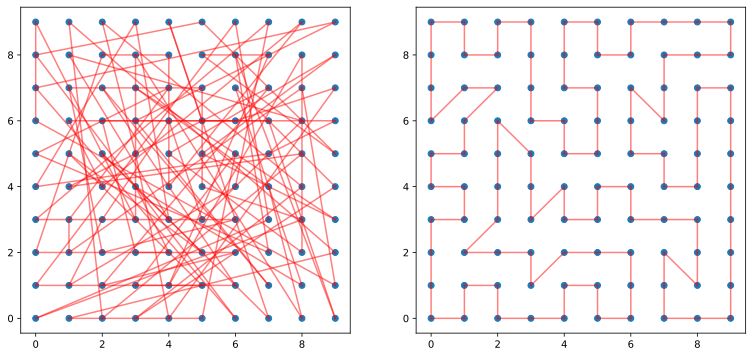

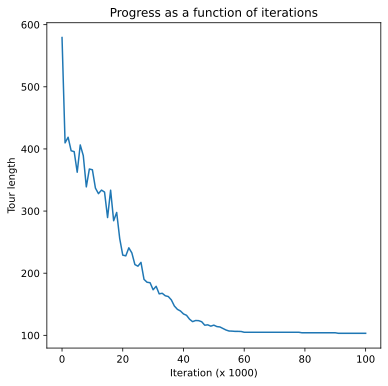

In [271]:
oneRun(1000)

Another run with additional steps

Tour length: 523.54
Tour length: 100.83
CPU times: user 44 s, sys: 208 ms, total: 44.2 s
Wall time: 44 s


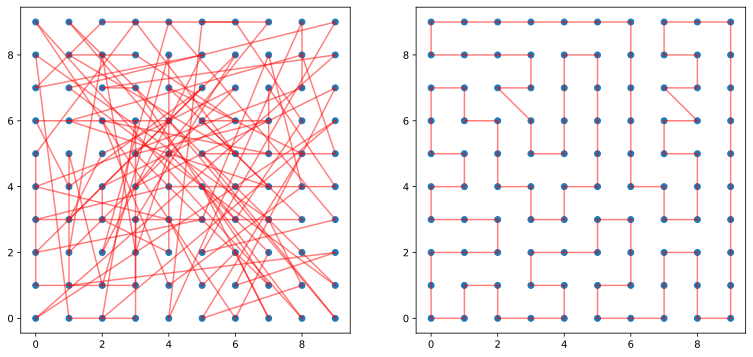

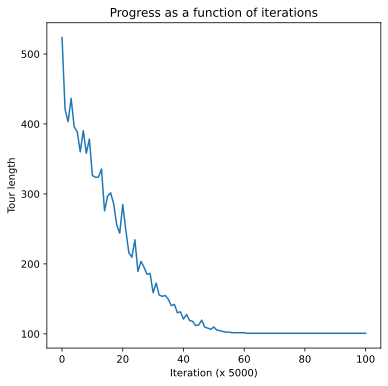

In [272]:
%%time
options = {'nsteps': 500000, 'Tinit':5, 'Tfinal':.01, 'schedule':'geometric'}

oneRun(5000)


### Random locations

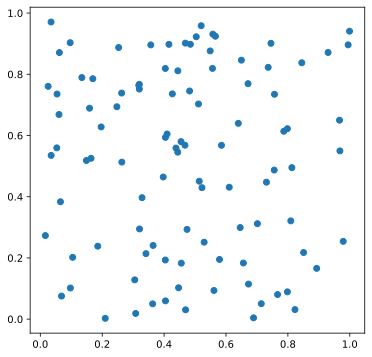

In [18]:
plt.rcParams["figure.figsize"] = (6,6)

ncities = 100
X = np.random.rand(ncities,2)
locations = [(x[0], x[1]) for x in X]

tsp = TravelingSalesman(locations)
tsp.drawTour()
plt.show()

One run

Tour length: 50.04
Tour length: 8.49
CPU times: user 43.5 s, sys: 214 ms, total: 43.7 s
Wall time: 43.5 s


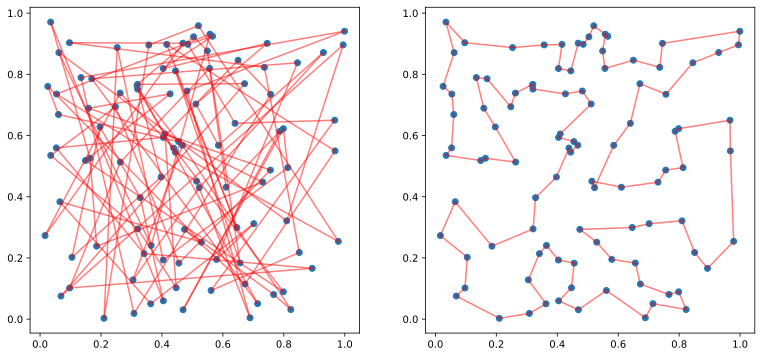

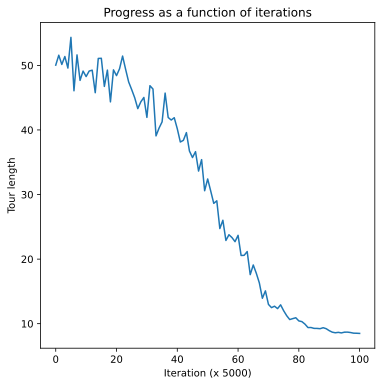

In [21]:
%%time
options = {'nsteps': 500000, 'Tinit':5, 'Tfinal':.01, 'schedule':'geometric'}
oneRun(5000)


Another run on same map

Tour length: 51.65
Tour length: 8.73
CPU times: user 43.7 s, sys: 212 ms, total: 44 s
Wall time: 43.7 s


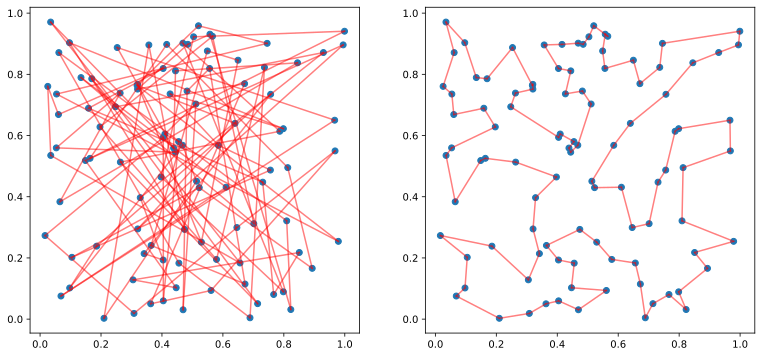

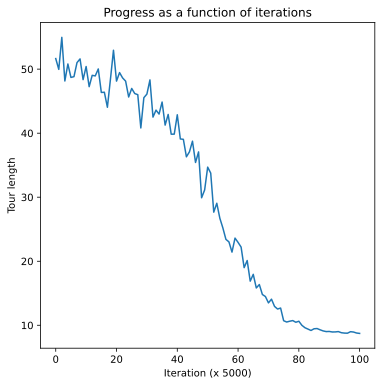

In [22]:
%%time
options = {'nsteps': 500000, 'Tinit':5, 'Tfinal':.01, 'schedule':'geometric'}
oneRun(5000)


Tour length: 54.42
Tour length: 8.60
CPU times: user 43.6 s, sys: 203 ms, total: 43.8 s
Wall time: 43.6 s


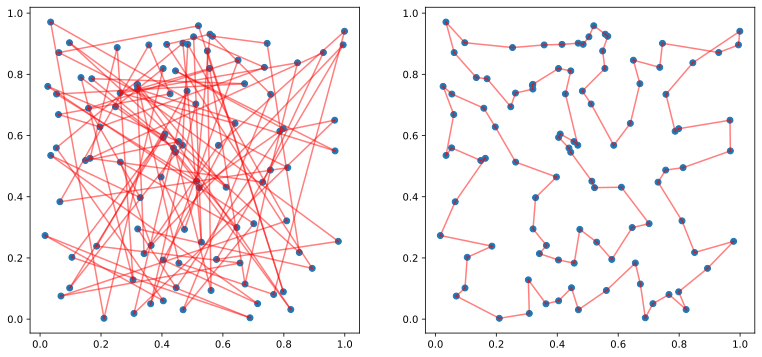

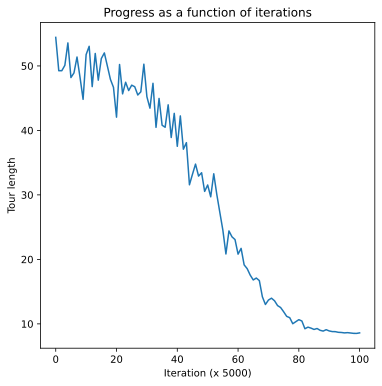

In [26]:
%%time
options = {'nsteps': 500000, 'Tinit':5, 'Tfinal':.01, 'schedule':'geometric'}
oneRun(5000)


New map

Tour length: 52.42
Tour length: 8.43


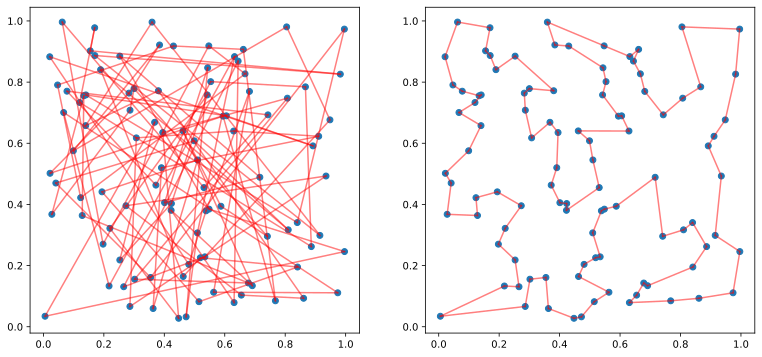

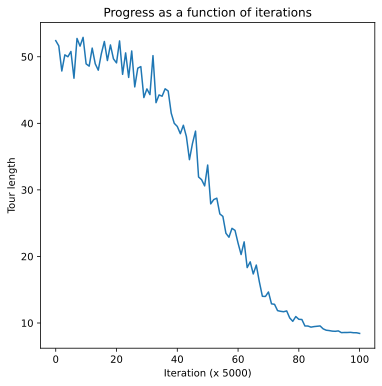

In [27]:
X = np.random.rand(ncities,2)
locations = [(x[0], x[1]) for x in X]

oneRun(5000)